# Atliq Hardware Sales Insights

In [1]:
#importing the python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## importing the data

In [2]:
customers = pd.read_csv('Customers.csv')

In [3]:
customers.head()

,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar
3,Cus004,Surface Stores,Brick & Mortar
4,Cus005,Premium Stores,Brick & Mortar


In [4]:
markets = pd.read_csv('markets.csv')

In [5]:
markets.head()

,markets_code,markets_name,zone
0,Mark001,Chennai,South
1,Mark002,Mumbai,Central
2,Mark003,Ahmedabad,North
3,Mark004,Delhi NCR,North
4,Mark005,Kanpur,North


In [6]:
products = pd.read_csv('Products.csv')

In [7]:
products.head()

,product_code,product_type
0,Prod001,Own Brand\r
1,Prod002,Own Brand\r
2,Prod003,Own Brand\r
3,Prod004,Own Brand\r
4,Prod005,Own Brand\r


In [8]:
transactions = pd.read_csv('Transactions.csv')

In [9]:
transactions.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR
1,Prod001,Cus002,Mark002,2018-05-08,3,-1,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR


In [41]:
dates = pd.read_csv('Dates.csv')

In [42]:
dates.head()

,date,cy_date,year,month_name,date_yy_mmm
0,2017-06-01,2017-06-01,2017,June,17-Jun\r
1,2017-06-02,2017-06-01,2017,June,17-Jun\r
2,2017-06-03,2017-06-01,2017,June,17-Jun\r
3,2017-06-04,2017-06-01,2017,June,17-Jun\r
4,2017-06-05,2017-06-01,2017,June,17-Jun\r


In [43]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1126 non-null   object
 1   cy_date      1126 non-null   object
 2   year         1126 non-null   int64 
 3   month_name   1126 non-null   object
 4   date_yy_mmm  1126 non-null   object
dtypes: int64(1), object(4)
memory usage: 44.1+ KB


## Data Cleaning

### Checking  for any null values

Checking  for any null values

In [10]:
#customers table
customers.isna().sum()

customer_code    0
custmer_name     0
customer_type    0
dtype: int64

No null values in the customers table

In [11]:
#transactions table
transactions.isna().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
dtype: int64

No null values in the Transactions table

In [12]:
#products table
products.isna().sum()

product_code    0
product_type    0
dtype: int64

No null values in the products table

In [13]:
#markets table
markets.isna().sum()

markets_code    0
markets_name    0
zone            2
dtype: int64

there are two null values in the zone column of markets table

In [14]:
markets[markets.zone.isna()]

,markets_code,markets_name,zone
15,Mark097,New York,NaN
16,Mark999,Paris,NaN


- The reason behind zone of two rows is null because the company exported the products to New York and Paris which are abroad cities which doesn't include zones in India 

###dates table

### Categorical Features

###customers table

In [15]:
customers.dtypes  # all there are categorical 


customer_code    object
custmer_name     object
customer_type    object
dtype: object

Correcting the column names

In [16]:
customers.columns = ['customer_code', 'customer_name', 'customer_type']

In [17]:
customers.columns

Index(['customer_code', 'customer_name', 'customer_type'], dtype='object')

In [18]:
customers.customer_code.value_counts()

Cus012    1
Cus013    1
Cus030    1
Cus005    1
Cus009    1
Cus029    1
Cus034    1
Cus037    1
Cus019    1
Cus007    1
Cus015    1
Cus003    1
Cus036    1
Cus010    1
Cus031    1
Cus014    1
Cus028    1
Cus011    1
Cus017    1
Cus032    1
Cus033    1
Cus020    1
Cus018    1
Cus023    1
Cus027    1
Cus026    1
Cus016    1
Cus035    1
Cus025    1
Cus001    1
Cus038    1
Cus024    1
Cus022    1
Cus006    1
Cus008    1
Cus021    1
Cus004    1
Cus002    1
Name: customer_code, dtype: int64

In [19]:
customers.customer_name.value_counts()

Flawless Stores             1
Sage                        1
Novus                       1
Integration Stores          1
Premium Stores              1
Elite                       1
Excel Stores                1
Logic Stores                1
Insight                     1
Electricalsocity            1
Electricalslytical          1
Power                       1
Nixon                       1
Epic Stores                 1
Expression                  1
Unity Stores                1
Electricalsbea Stores       1
Zone                        1
Path                        1
All-Out                     1
Nomad Stores                1
Electricalsara Stores       1
Modular                     1
Electricalsopedia Stores    1
Synthetic                   1
Info Stores                 1
Leader                      1
Relief                      1
Acclaimed Stores            1
Surface Stores              1
Electricalslance Stores     1
Sound                       1
Forward Stores              1
Control   

In [20]:
customers.customer_type.value_counts()

Brick & Mortar    19
E-Commerce        19
Name: customer_type, dtype: int64

###tranactions table

In [21]:
transactions.dtypes

product_code     object
customer_code    object
market_code      object
order_date       object
sales_qty         int64
sales_amount      int64
currency         object
dtype: object

In [22]:
transactions['product_code'].unique()

array(['Prod001', 'Prod002', 'Prod003', 'Prod004', 'Prod005', 'Prod006',
       'Prod007', 'Prod008', 'Prod009', 'Prod010', 'Prod011', 'Prod012',
       'Prod013', 'Prod014', 'Prod015', 'Prod016', 'Prod017', 'Prod018',
       'Prod019', 'Prod020', 'Prod021', 'Prod022', 'Prod023', 'Prod024',
       'Prod025', 'Prod026', 'Prod027', 'Prod028', 'Prod029', 'Prod030',
       'Prod031', 'Prod032', 'Prod033', 'Prod034', 'Prod035', 'Prod036',
       'Prod037', 'Prod038', 'Prod039', 'Prod040', 'Prod041', 'Prod042',
       'Prod043', 'Prod044', 'Prod045', 'Prod046', 'Prod047', 'Prod048',
       'Prod049', 'Prod050', 'Prod051', 'Prod052', 'Prod053', 'Prod054',
       'Prod055', 'Prod056', 'Prod057', 'Prod058', 'Prod059', 'Prod060',
       'Prod061', 'Prod062', 'Prod063', 'Prod064', 'Prod065'],
      dtype=object)

In [23]:
transactions['customer_code'].unique()

array(['Cus001', 'Cus002', 'Cus003', 'Cus004', 'Cus005', 'Cus006',
       'Cus007', 'Cus008', 'Cus009', 'Cus010', 'Cus011', 'Cus012',
       'Cus013', 'Cus014', 'Cus015', 'Cus016', 'Cus017', 'Cus018',
       'Cus019', 'Cus020', 'Cus021', 'Cus022', 'Cus023', 'Cus024',
       'Cus025', 'Cus026', 'Cus027', 'Cus028', 'Cus029', 'Cus030',
       'Cus031', 'Cus032', 'Cus033', 'Cus034', 'Cus035', 'Cus036',
       'Cus037', 'Cus038'], dtype=object)

In [24]:
transactions.market_code.unique()

array(['Mark001', 'Mark002', 'Mark003', 'Mark004', 'Mark005', 'Mark006',
       'Mark007', 'Mark008', 'Mark009', 'Mark010', 'Mark011', 'Mark012'],
      dtype=object)

In [25]:
transactions.currency.unique()

array(['INR', 'USD', 'INR\\r'], dtype=object)

there are three types of currency categories 

In [26]:
#lets convert them into INR
transactions.currency.replace('INR\\r','INR',inplace=True)

In [27]:
#for converting USD into INR first, we have change the value of sales_amount
transactions.loc[transactions.currency == 'USD','sales_amount'] = transactions.loc[transactions.currency == 'USD','sales_amount'] * 71.5

###Products table

In [28]:
products.dtypes

product_code    object
product_type    object
dtype: object

In [29]:
products.product_type.value_counts()

Own Brand\r       191
Distribution\r     88
Name: product_type, dtype: int64

###Markets table

In [30]:
markets.dtypes

markets_code    object
markets_name    object
zone            object
dtype: object

In [31]:
markets.markets_code.value_counts()

Mark004    1
Mark006    1
Mark013    1
Mark002    1
Mark011    1
Mark008    1
Mark097    1
Mark015    1
Mark005    1
Mark001    1
Mark009    1
Mark010    1
Mark007    1
Mark003    1
Mark014    1
Mark999    1
Mark012    1
Name: markets_code, dtype: int64

In [32]:
markets.markets_name.value_counts()

Bhopal          2
Kanpur          1
Surat           1
Paris           1
New York        1
Kochi           1
Mumbai          1
Chennai         1
Nagpur          1
Delhi NCR       1
Lucknow         1
Ahmedabad       1
Patna           1
Bengaluru       1
Bhubaneshwar    1
Hyderabad       1
Name: markets_name, dtype: int64

In [33]:
markets.zone.value_counts()

North      6
South      5
Central    4
Name: zone, dtype: int64

sales_quantity and sales_amount in the transactions table should not be less than 0

In [34]:
#getting the index of rows that contain negative sales amount
neg_sales_amt = transactions.loc[transactions.sales_amount<0].index
neg_sales_amt

Int64Index([1, 282], dtype='int64')

In [35]:
#dropping the rows that containing negative sales amount
transactions.drop(neg_sales_amt,axis=0,inplace=True)

Now our data is clean so lets merge the tables to form one table for analysia using SQL

In [36]:


df = _deepnote_execute_sql("""SELECT t.*,
       p.product_type,
       c.customer_name,
       c.customer_type,
       m.markets_name,
       m.zone
      
FROM
transactions t
JOIN customers c on t.customer_code = c.customer_code 
JOIN products p on t.product_code = p.product_code
JOIN markets m on t.market_code = m.markets_code
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_type,customer_name,customer_type,markets_name,zone
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR,Own Brand\r,Surge Stores,Brick & Mortar,Chennai,South
1,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR,Own Brand\r,Excel Stores,Brick & Mortar,Ahmedabad,North
2,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR,Own Brand\r,Excel Stores,Brick & Mortar,Ahmedabad,North
3,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR,Own Brand\r,Surface Stores,Brick & Mortar,Ahmedabad,North
4,Prod003,Cus005,Mark004,2017-11-20,59,35750.0,USD,Own Brand\r,Premium Stores,Brick & Mortar,Delhi NCR,North
...,...,...,...,...,...,...,...,...,...,...,...,...
17634,Prod065,Cus003,Mark003,2018-02-22,112,28269.0,INR,Own Brand\r,Excel Stores,Brick & Mortar,Ahmedabad,North
17635,Prod065,Cus023,Mark011,2018-02-22,1,245.0,INR,Own Brand\r,Sound,E-Commerce,Nagpur,Central
17636,Prod065,Cus015,Mark006,2018-02-23,1,0.0,INR,Own Brand\r,Electricalsbea Stores,Brick & Mortar,Bengaluru,South
17637,Prod065,Cus010,Mark003,2018-02-23,11,2667.0,INR,Own Brand\r,Atlas Stores,Brick & Mortar,Ahmedabad,North


The above SQL query result is stored in df variable

In [37]:
df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_type,customer_name,customer_type,markets_name,zone
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR,Own Brand\r,Surge Stores,Brick & Mortar,Chennai,South
1,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR,Own Brand\r,Excel Stores,Brick & Mortar,Ahmedabad,North
2,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR,Own Brand\r,Excel Stores,Brick & Mortar,Ahmedabad,North
3,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR,Own Brand\r,Surface Stores,Brick & Mortar,Ahmedabad,North
4,Prod003,Cus005,Mark004,2017-11-20,59,35750.0,USD,Own Brand\r,Premium Stores,Brick & Mortar,Delhi NCR,North


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17639 entries, 0 to 17638
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_code   17639 non-null  object 
 1   customer_code  17639 non-null  object 
 2   market_code    17639 non-null  object 
 3   order_date     17639 non-null  object 
 4   sales_qty      17639 non-null  int64  
 5   sales_amount   17639 non-null  float64
 6   currency       17639 non-null  object 
 7   product_type   17639 non-null  object 
 8   customer_name  17639 non-null  object 
 9   customer_type  17639 non-null  object 
 10  markets_name   17639 non-null  object 
 11  zone           17639 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.6+ MB


## Data Analysis

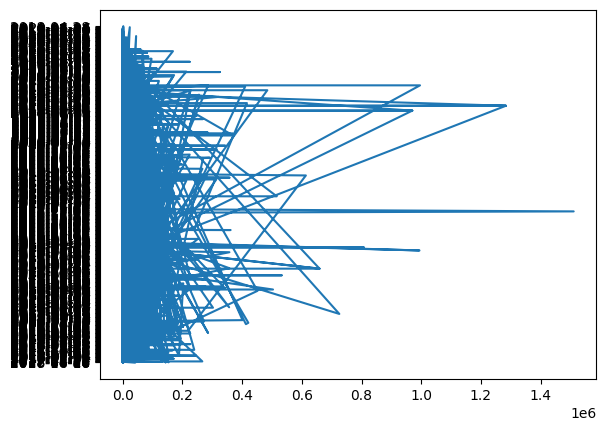

In [40]:
#trends in sales values by year
plt.plot(df.sales_amount,df.order_date)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f64cf13-61c3-4597-978a-72ae66356971' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>